### Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

### Read Data

In [2]:
df = pd.read_csv('social_media_engagement class.csv')
df.head()

,post_id,platform,post_type,post_time,caption,hashtags,likes,comments,shares,caption_length,num_hashtags,post_hour,post_day,sentiment_score
0,1,Facebook,image,2023-08-17 14:45,Best day ever! 🎉,#Social,2121,474,628,16,1,14,Thursday,positive
1,2,Facebook,carousel,2023-05-14 00:45,Here's a quick update.,"#Family, #Community, #Events",3660,432,694,22,3,0,Sunday,neutral
2,3,Instagram,poll,2023-02-21 16:15,Not my best day. 😞,"#Beauty, #Fashion, #InstaDaily",4955,408,688,18,3,16,Tuesday,negative
3,4,Twitter,image,2023-11-16 00:45,Disappointed but moving on.,"#Trending, #Tech, #Entertainment",1183,90,187,27,3,0,Thursday,negative
4,5,Twitter,video,2023-05-23 00:30,Exciting news! 🚀,"#News, #Politics, #Entertainment",3499,247,286,16,3,0,Tuesday,positive


In [3]:
df.shape

(1000, 14)

In [4]:
df.columns

Index(['post_id', 'platform', 'post_type', 'post_time', 'caption', 'hashtags',
       'likes', 'comments', 'shares', 'caption_length', 'num_hashtags',
       'post_hour', 'post_day', 'sentiment_score'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   post_id          1000 non-null   int64 
 1   platform         1000 non-null   object
 2   post_type        1000 non-null   object
 3   post_time        1000 non-null   object
 4   caption          1000 non-null   object
 5   hashtags         1000 non-null   object
 6   likes            1000 non-null   int64 
 7   comments         1000 non-null   int64 
 8   shares           1000 non-null   int64 
 9   caption_length   1000 non-null   int64 
 10  num_hashtags     1000 non-null   int64 
 11  post_hour        1000 non-null   int64 
 12  post_day         1000 non-null   object
 13  sentiment_score  1000 non-null   object
dtypes: int64(7), object(7)
memory usage: 109.5+ KB


In [6]:
df['sentiment_score'].value_counts()

sentiment_score
positive    343
neutral     336
negative    321
Name: count, dtype: int64

In [7]:
df.isnull().sum()

post_id            0
platform           0
post_type          0
post_time          0
caption            0
hashtags           0
likes              0
comments           0
shares             0
caption_length     0
num_hashtags       0
post_hour          0
post_day           0
sentiment_score    0
dtype: int64

In [8]:
df.drop(columns=['post_id','post_time','hashtags','caption_length','num_hashtags','post_hour','post_day'],axis=1,inplace=True)
df

,platform,post_type,caption,likes,comments,shares,sentiment_score
0,Facebook,image,Best day ever! 🎉,2121,474,628,positive
1,Facebook,carousel,Here's a quick update.,3660,432,694,neutral
2,Instagram,poll,Not my best day. 😞,4955,408,688,negative
3,Twitter,image,Disappointed but moving on.,1183,90,187,negative
4,Twitter,video,Exciting news! 🚀,3499,247,286,positive
...,...,...,...,...,...,...,...
995,Instagram,video,Not my best day. 😞,5000,338,420,negative
996,Twitter,image,Could be better.,880,90,45,negative
997,Instagram,video,Feeling down today.,5000,263,274,negative
998,Facebook,text,Best day ever! 🎉,1075,46,21,positive


### Visualiztion

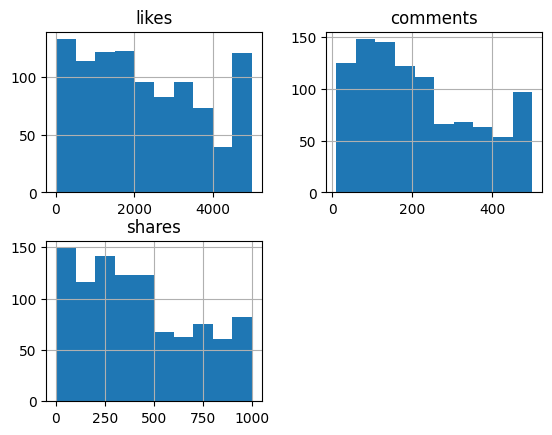

In [9]:
df.hist(bins=10)
plt.show()

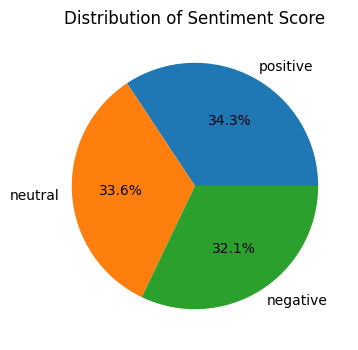

In [10]:
x = df['sentiment_score'].value_counts()

plt.figure(figsize=(4,4))
plt.pie(x, labels=x.index, autopct='%1.1f%%')
plt.title('Distribution of Sentiment Score')
plt.show()

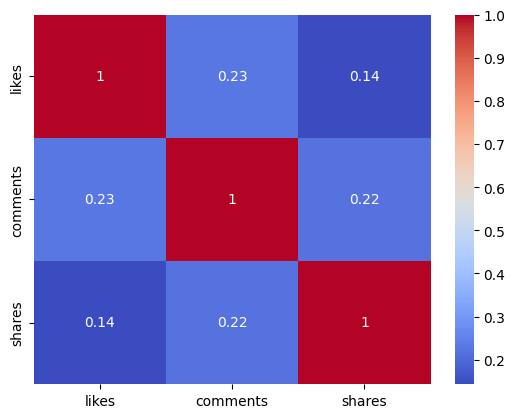

In [11]:
num_val = df.select_dtypes(include=np.number).columns
sns.heatmap(data=df[num_val].corr(), annot=True, cmap='coolwarm')
plt.show()

### ML Model

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [13]:
scaler = MinMaxScaler()
df[num_val] = scaler.fit_transform(df[num_val])

In [14]:
cat_val = df.select_dtypes(include=object)
for col in cat_val:
    le =LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [15]:
df

,platform,post_type,caption,likes,comments,shares,sentiment_score
0,0,1,1,0.4242,0.946939,0.628,2
1,0,0,6,0.7320,0.861224,0.694,1
2,1,2,10,0.9910,0.812245,0.688,0
3,2,1,3,0.2366,0.163265,0.187,0
4,2,4,4,0.6998,0.483673,0.286,2
...,...,...,...,...,...,...,...
995,1,4,10,1.0000,0.669388,0.420,0
996,2,1,2,0.1760,0.163265,0.045,0
997,1,4,5,1.0000,0.516327,0.274,0
998,0,3,1,0.2150,0.073469,0.021,2


In [16]:
X = df.drop('sentiment_score', axis=1)
y = df['sentiment_score']

In [17]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
model = knn.fit(X_train,y_train)
model

KNeighborsClassifier(n_neighbors=3)

In [19]:
knn_pred = model.predict(X_test)
knn_pred[:5]

array([1, 0, 0, 0, 1])

In [20]:
model.score(X_train,y_train)               # train acc

0.99875

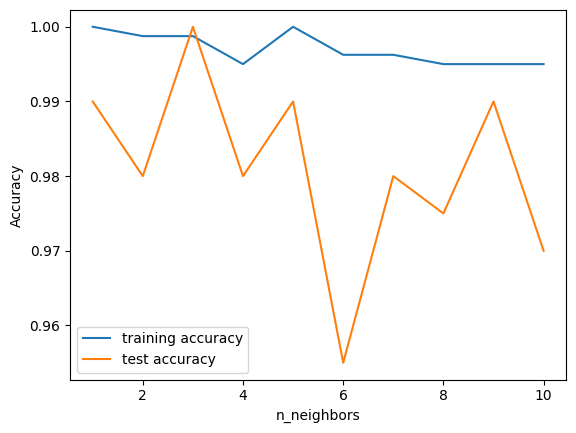

In [21]:
import matplotlib.pyplot as plt 
neighbors = range(1,11)
train_acc = []
test_acc = []
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    model = knn.fit(X_train,y_train)
    train_acc.append(model.score(X_train,y_train))
    test_acc.append(model.score(X_test,y_test))
plt.plot(neighbors,train_acc,label="training accuracy")
plt.plot(neighbors,test_acc,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()